# Clasificación de Depresion en estudiantes

1. Preparación de Datos
2. División de los datos 70-30
3. Aprendizaje del Modelo: Tree, Knn, NN, SVM, RandomForest
4. Evaluación del Modelo: matriz de confusion, P,R, ROC
5. Guardar el modelo

* El despliegue se realiza en otro jupyter_notebook

In [133]:
# Importamos librerías básicas
import pandas as pd  # manipulación dataframes
import numpy as np   # matrices y vectores
import matplotlib.pyplot as plt  # gráfica
import kagglehub  # descargar datasets

In [134]:
# Descargar el dataset desde Kaggle
path = kagglehub.dataset_download("hopesb/student-depression-dataset")
print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/student-depression-dataset


In [135]:
# Leer el archivo CSV (usando la ruta descargada)
data = pd.read_csv(f"{path}/Student Depression Dataset.csv")

In [136]:
# Mostrar las primeras filas del DataFrame
data.head()

id  Gender   Age           City Profession  Academic Pressure  \
0   2    Male  33.0  Visakhapatnam    Student                5.0   
1   8  Female  24.0      Bangalore    Student                2.0   
2  26    Male  31.0       Srinagar    Student                3.0   
3  30  Female  28.0       Varanasi    Student                3.0   
4  32  Female  25.0         Jaipur    Student                4.0   

   Work Pressure  CGPA  Study Satisfaction  Job Satisfaction  \
0            0.0  8.97                 2.0               0.0   
1            0.0  5.90                 5.0               0.0   
2            0.0  7.03                 5.0               0.0   
3            0.0  5.59                 2.0               0.0   
4            0.0  8.13                 3.0               0.0   

      Sleep Duration Dietary Habits   Degree  \
0          5-6 hours        Healthy  B.Pharm   
1          5-6 hours       Moderate      BSc   
2  Less than 5 hours        Healthy       BA   
3          7-8 hours       Moderate      BCA   
4          5-6 hours       Moderate   M.Tech   

  Have you ever had suicidal thoughts ?  Work/Study Hours  Financial Stress  \
0                                   Yes               3.0               1.0   
1                                    No               3.0               2.0   
2                                    No               9.0               1.0   
3                                   Yes               4.0               5.0   
4                                   Yes               1.0               1.0   

  Family History of Mental Illness  Depression  
0                               No           1  
1                              Yes           0  
2                              Yes           0  
3                              Yes           1  
4                               No           0

In [137]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

In [138]:
#convertir mi variable objetivo en categorica ya que no es numerica
data['Depression'] = data['Depression'].replace({1: 'Si', 0: 'No'})
print(data.head())

   id  Gender   Age           City Profession  Academic Pressure  \
0   2    Male  33.0  Visakhapatnam    Student                5.0   
1   8  Female  24.0      Bangalore    Student                2.0   
2  26    Male  31.0       Srinagar    Student                3.0   
3  30  Female  28.0       Varanasi    Student                3.0   
4  32  Female  25.0         Jaipur    Student                4.0   

   Work Pressure  CGPA  Study Satisfaction  Job Satisfaction  \
0            0.0  8.97                 2.0               0.0   
1            0.0  5.90                 5.0               0.0   
2            0.0  7.03                 5.0               0.0   
3            0.0  5.59                 2.0               0.0   
4            0.0  8.13                 3.0               0.0   

      Sleep Duration Dietary Habits   Degree  \
0          5-6 hours        Healthy  B.Pharm   
1          5-6 hours       Moderate      BSc   
2  Less than 5 hours        Healthy       BA   
3          7-8

In [139]:
#Corrección de variables categóricas
data['Gender']=data['Gender'].astype('category')
data['City']=data['City'].astype('category')
data['Profession']=data['Profession'].astype('category')
data['Sleep Duration']=data['Sleep Duration'].astype('category')
data['Dietary Habits']=data['Dietary Habits'].astype('category')
data['Degree']=data['Degree'].astype('category')
data['Have you ever had suicidal thoughts ?']=data['Have you ever had suicidal thoughts ?'].astype('category')
data['Family History of Mental Illness']=data['Family History of Mental Illness'].astype('category')
data['Depression']=data['Depression'].astype('category')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype   
---  ------                                 --------------  -----   
 0   id                                     27901 non-null  int64   
 1   Gender                                 27901 non-null  category
 2   Age                                    27901 non-null  float64 
 3   City                                   27901 non-null  category
 4   Profession                             27901 non-null  category
 5   Academic Pressure                      27901 non-null  float64 
 6   Work Pressure                          27901 non-null  float64 
 7   CGPA                                   27901 non-null  float64 
 8   Study Satisfaction                     27901 non-null  float64 
 9   Job Satisfaction                       27901 non-null  float64 
 10  Sleep Duration                         27901 non-null  cat

#descripcion de variables numericas

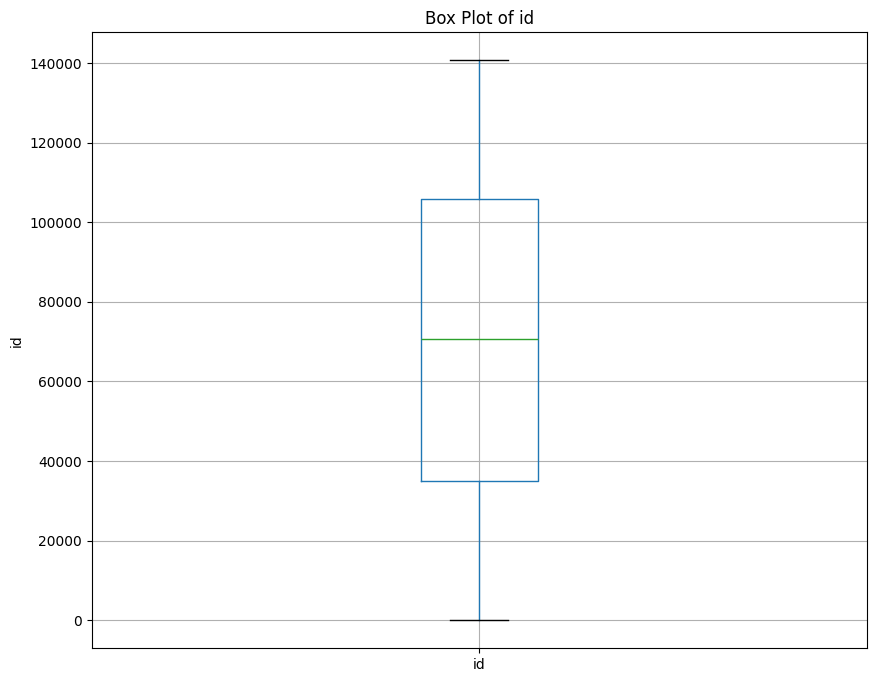

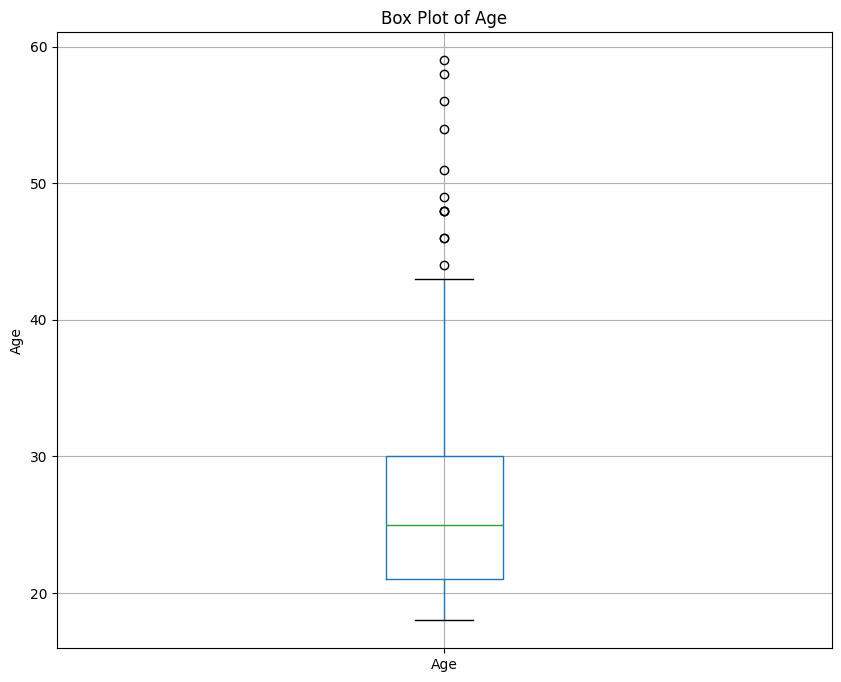

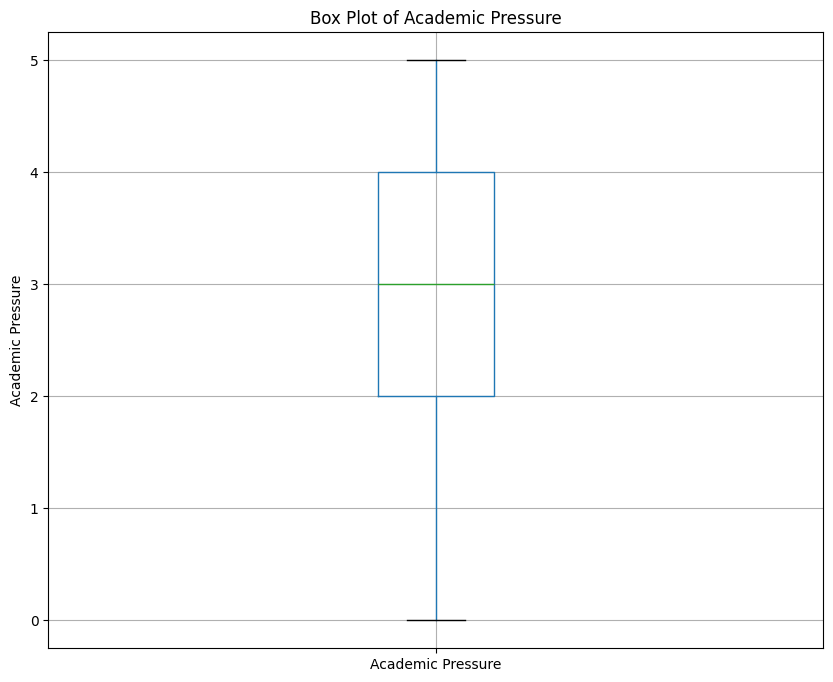

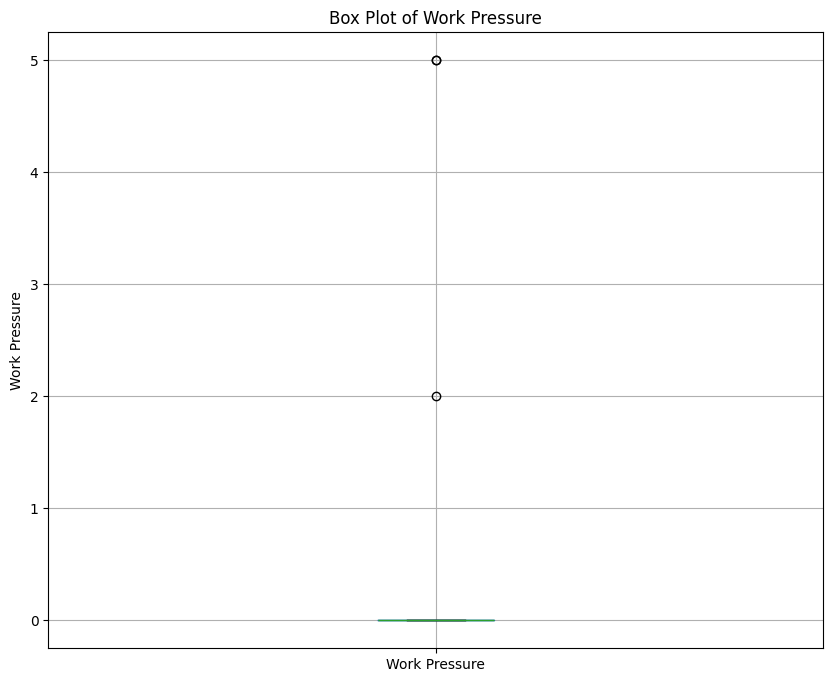

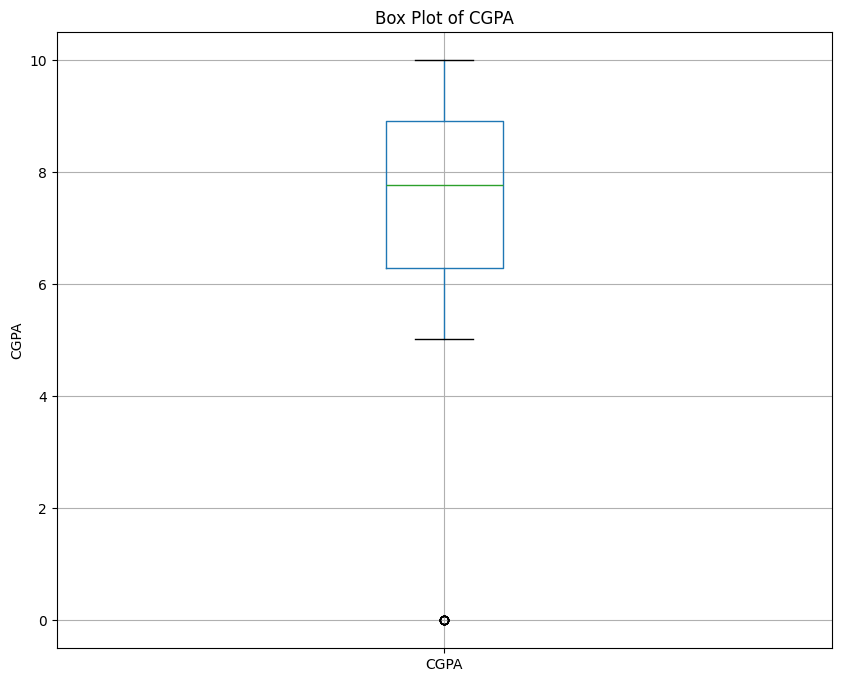

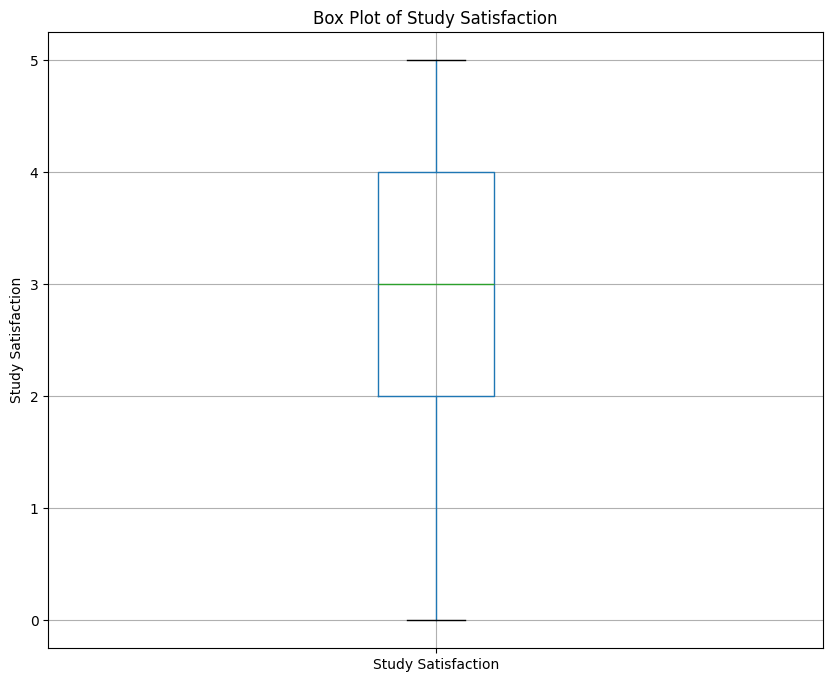

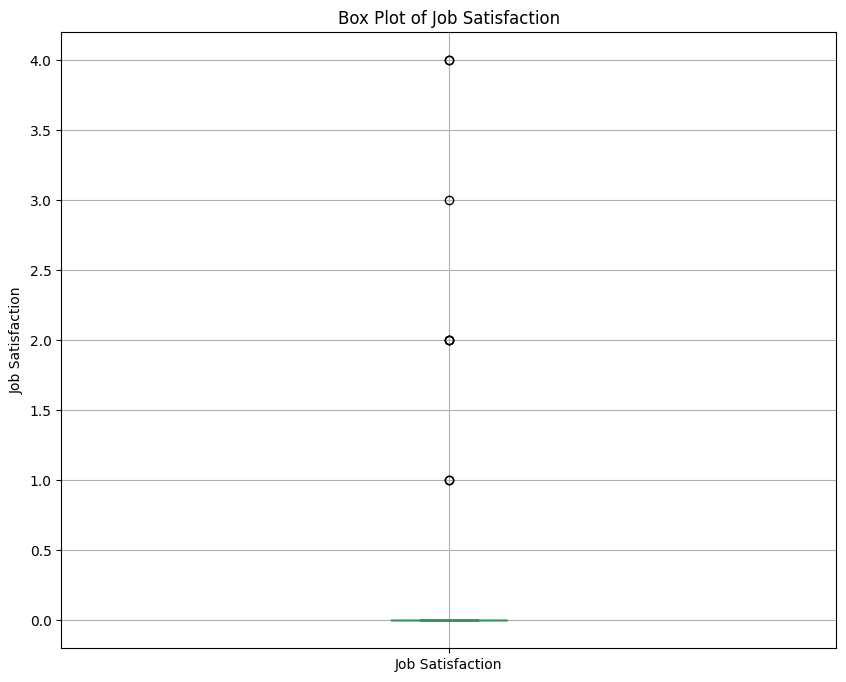

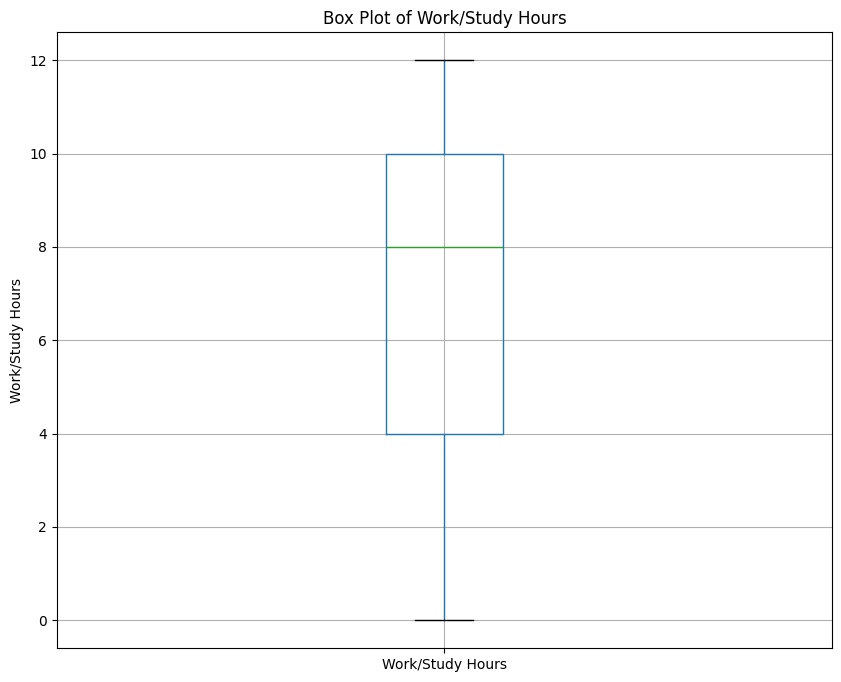

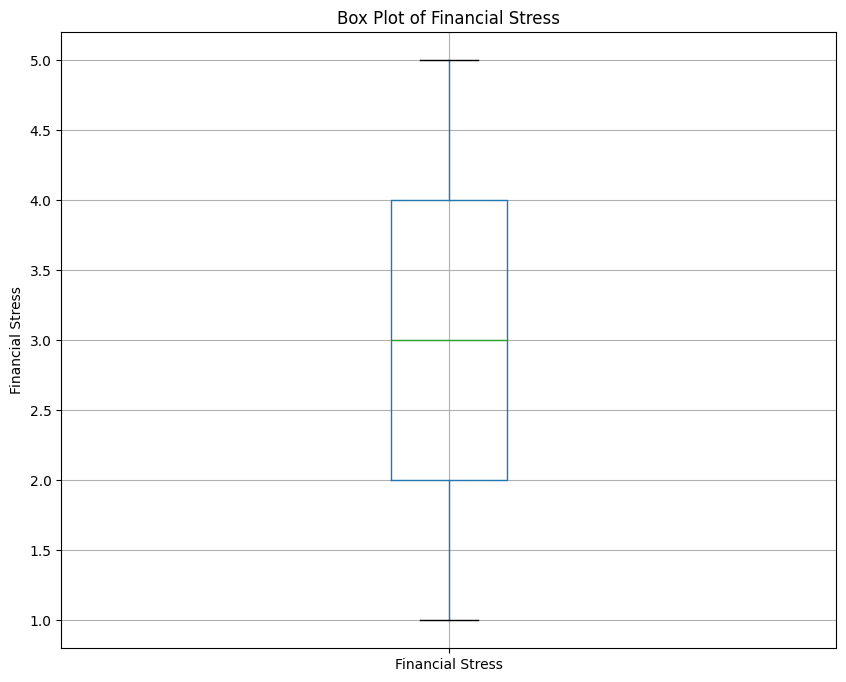

In [140]:
#Descripción variables numérica
numeric_cols = data.select_dtypes(include=np.number).columns

for col in numeric_cols:
  plt.figure(figsize=(10, 8))
  data.boxplot(column=col)
  plt.title(f'Box Plot of {col}')
  plt.ylabel(col)
  plt.show()

#Descripcion de variables categoricas

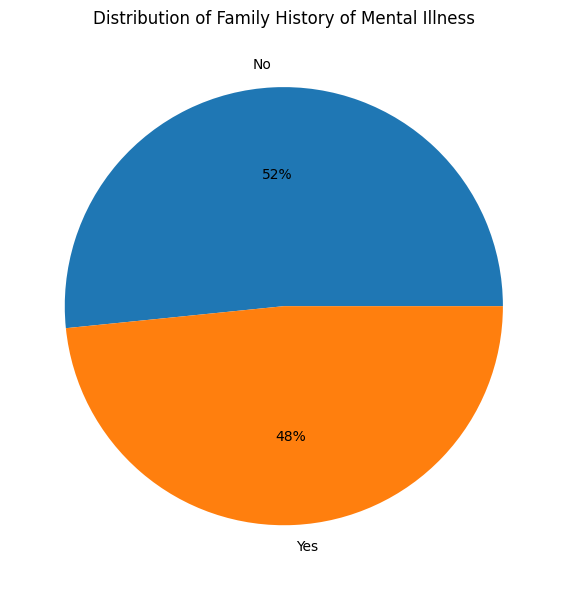

In [141]:
plt.figure(figsize=(12, 6))
data['Family History of Mental Illness'].value_counts().plot(kind='pie', autopct='%.0f%%')
plt.title('Distribution of Family History of Mental Illness')
plt.ylabel('')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

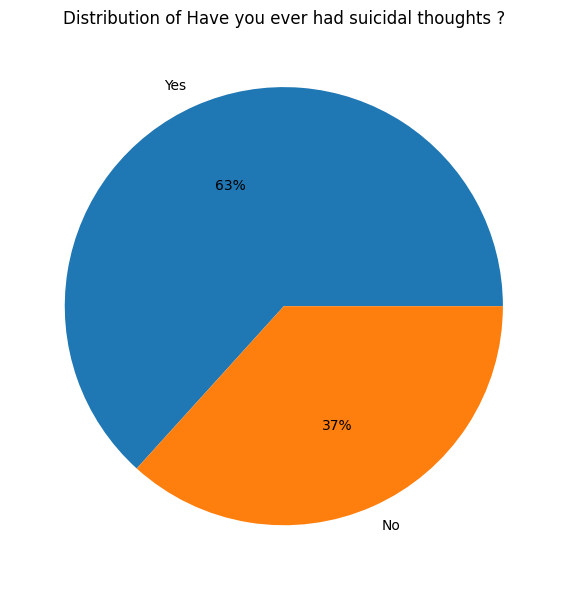

In [142]:
plt.figure(figsize=(12, 6))
data['Have you ever had suicidal thoughts ?'].value_counts().plot(kind='pie', autopct='%.0f%%')
plt.title('Distribution of Have you ever had suicidal thoughts ?')
plt.ylabel('')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

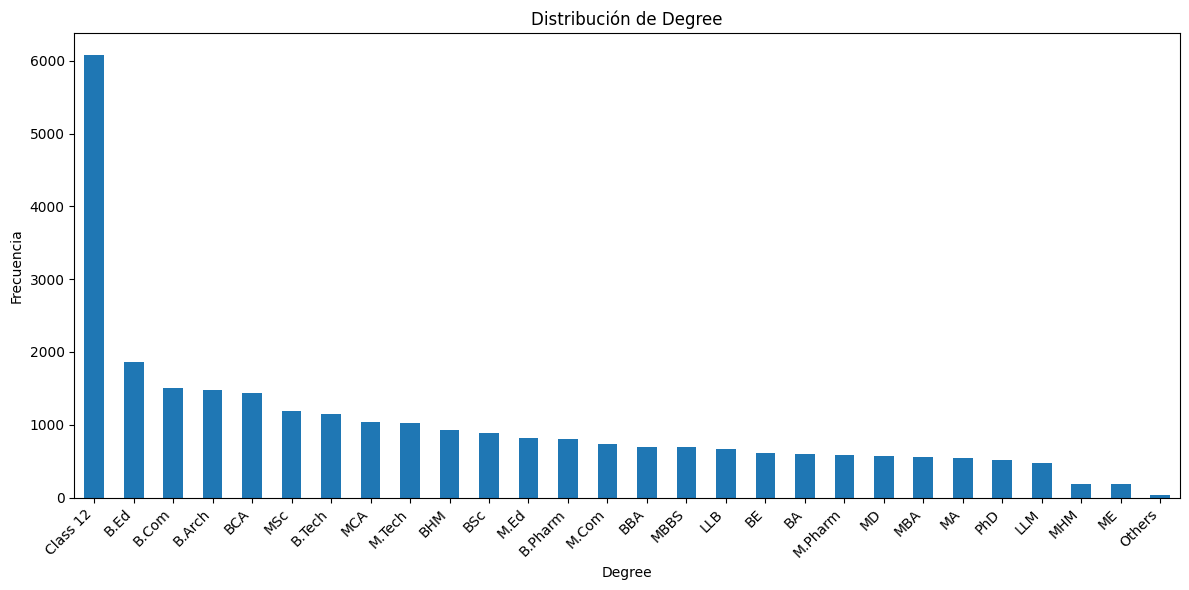

In [143]:
plt.figure(figsize=(12, 6))
data['Degree'].value_counts().plot(kind='bar')
plt.title('Distribución de Degree')
plt.xlabel('Degree')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

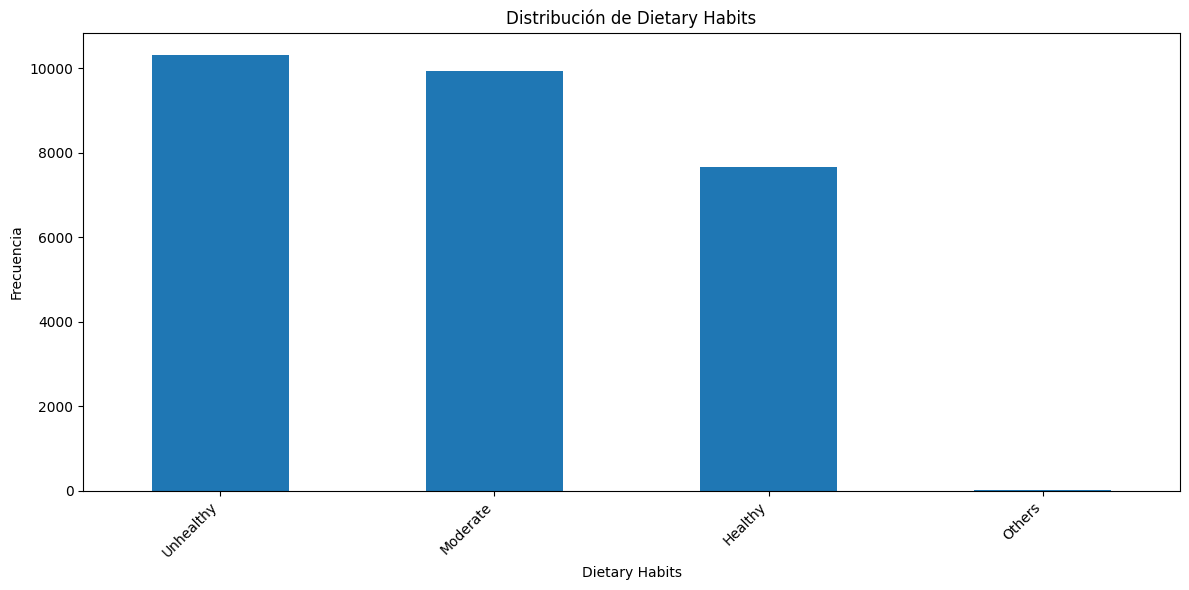

In [144]:
plt.figure(figsize=(12, 6))
data['Dietary Habits'].value_counts().plot(kind='bar')
plt.title('Distribución de Dietary Habits')
plt.xlabel('Dietary Habits')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

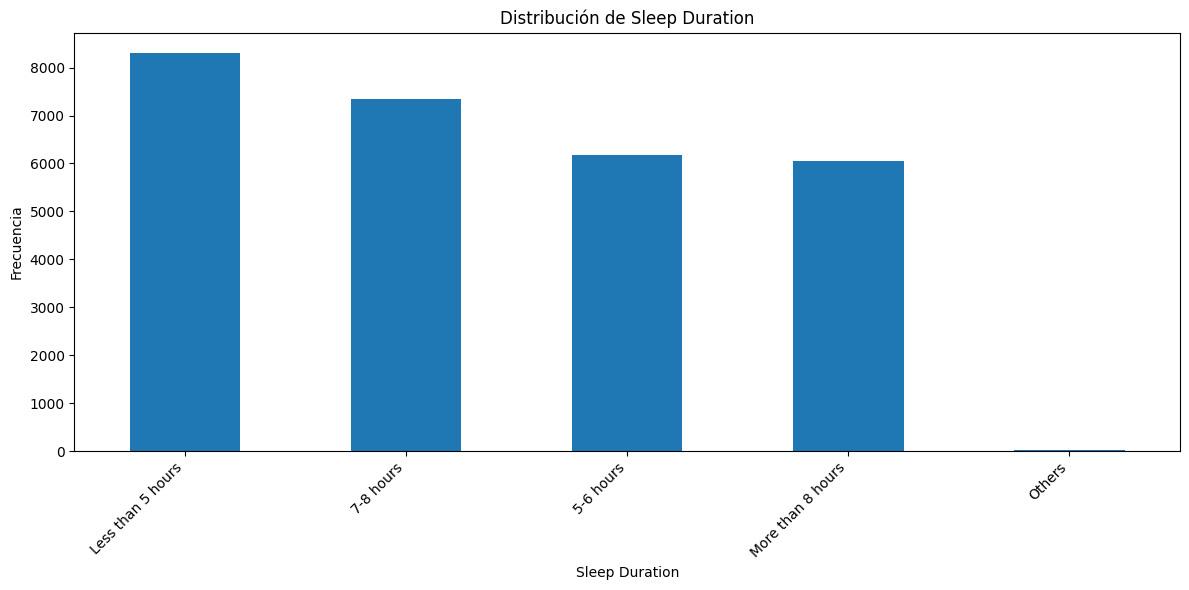

In [145]:
plt.figure(figsize=(12, 6))
data['Sleep Duration'].value_counts().plot(kind='bar')
plt.title('Distribución de Sleep Duration')
plt.xlabel('Sleep Duration')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

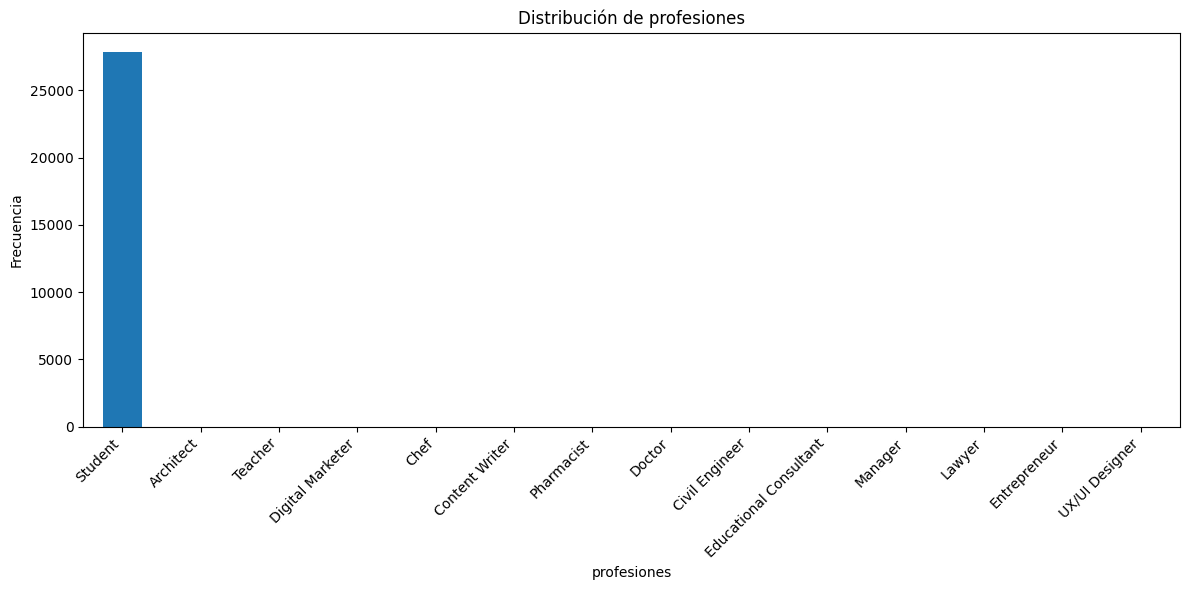

In [146]:
plt.figure(figsize=(12, 6))
data['Profession'].value_counts().plot(kind='bar')
plt.title('Distribución de profesiones')
plt.xlabel('profesiones')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

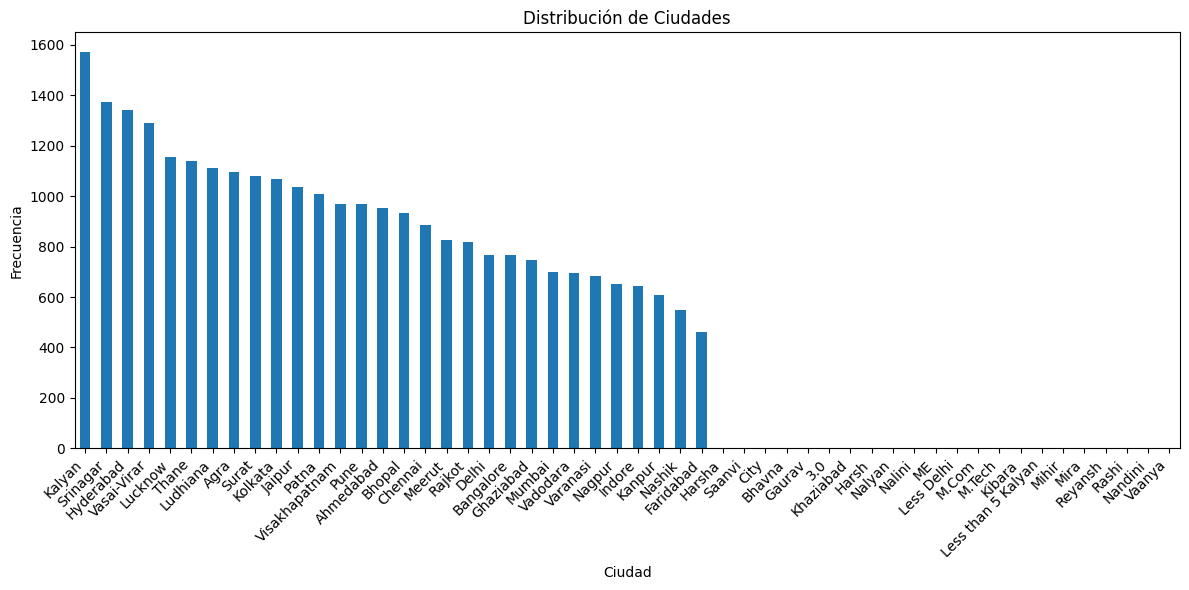

In [147]:
plt.figure(figsize=(12, 6))
data['City'].value_counts().plot(kind='bar')
plt.title('Distribución de Ciudades')
plt.xlabel('Ciudad')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

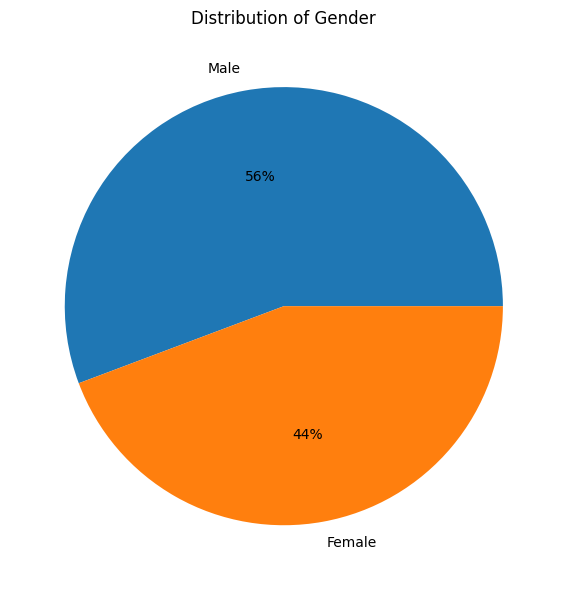

In [148]:
plt.figure(figsize=(12, 6))
data['Gender'].value_counts().plot(kind='pie', autopct='%.0f%%')
plt.title('Distribution of Gender')
plt.ylabel('')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

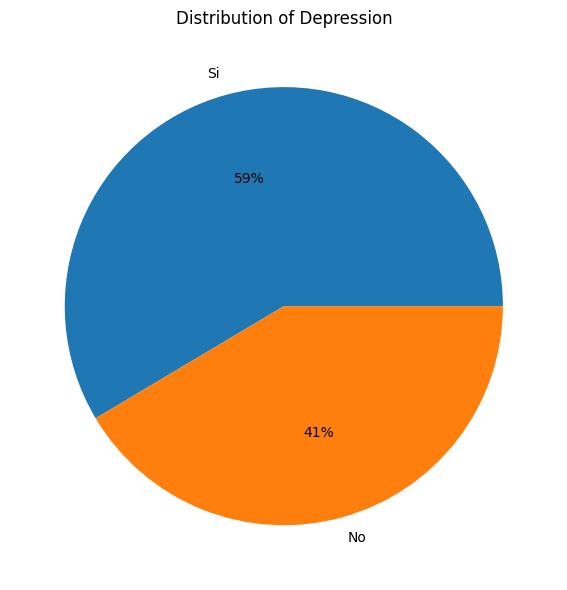

In [149]:
plt.figure(figsize=(12, 6))
data['Depression'].value_counts().plot(kind='pie', autopct='%.0f%%')
plt.title('Distribution of Depression')
plt.ylabel('')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

#Perfilado de los datos

In [150]:
# Instalar pandas profiling
!pip install ydata-profiling

In [151]:
# Cargar librería para Profiling
from pandas_profiling import ProfileReport

profile_data=ProfileReport(data, minimal=False) # minimal=True
profile_data

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 18/18 [00:00<00:00, 31.00it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [152]:
#Guardamos en html el perfilado de datos
profile_data.to_file(output_file="output.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [153]:
# Variables irrelevantes para el proceso de minería
data = data.drop('id',axis=1) #Eliminamos el ID por ser irrelevante, axis=1 indica que es una columna
data.head()

Gender   Age           City Profession  Academic Pressure  Work Pressure  \
0    Male  33.0  Visakhapatnam    Student                5.0            0.0   
1  Female  24.0      Bangalore    Student                2.0            0.0   
2    Male  31.0       Srinagar    Student                3.0            0.0   
3  Female  28.0       Varanasi    Student                3.0            0.0   
4  Female  25.0         Jaipur    Student                4.0            0.0   

   CGPA  Study Satisfaction  Job Satisfaction     Sleep Duration  \
0  8.97                 2.0               0.0          5-6 hours   
1  5.90                 5.0               0.0          5-6 hours   
2  7.03                 5.0               0.0  Less than 5 hours   
3  5.59                 2.0               0.0          7-8 hours   
4  8.13                 3.0               0.0          5-6 hours   

  Dietary Habits   Degree Have you ever had suicidal thoughts ?  \
0        Healthy  B.Pharm                                   Yes   
1       Moderate      BSc                                    No   
2        Healthy       BA                                    No   
3       Moderate      BCA                                   Yes   
4       Moderate   M.Tech                                   Yes   

   Work/Study Hours  Financial Stress Family History of Mental Illness  \
0               3.0               1.0                               No   
1               3.0               2.0                              Yes   
2               9.0               1.0                              Yes   
3               4.0               5.0                              Yes   
4               1.0               1.0                               No   

  Depression  
0         Si  
1         No  
2         No  
3         Si  
4         No

In [154]:
#Limpieza de datos nulos: Imputación por la media y moda
from sklearn.impute import SimpleImputer

#Imputacion de variables numéricas: media
ImpNumeros = SimpleImputer(missing_values=np.nan, strategy='mean')
data[['Financial Stress']] = ImpNumeros.fit_transform(data[['Financial Stress']])

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 17 columns):
 #   Column                                 Non-Null Count  Dtype   
---  ------                                 --------------  -----   
 0   Gender                                 27901 non-null  category
 1   Age                                    27901 non-null  float64 
 2   City                                   27901 non-null  category
 3   Profession                             27901 non-null  category
 4   Academic Pressure                      27901 non-null  float64 
 5   Work Pressure                          27901 non-null  float64 
 6   CGPA                                   27901 non-null  float64 
 7   Study Satisfaction                     27901 non-null  float64 
 8   Job Satisfaction                       27901 non-null  float64 
 9   Sleep Duration                         27901 non-null  category
 10  Dietary Habits                         27901 non-null  cat

In [155]:
data = data[data['Profession'] == 'Student']
data = data.drop(columns=['Profession'])
data.head()

Gender   Age           City  Academic Pressure  Work Pressure  CGPA  \
0    Male  33.0  Visakhapatnam                5.0            0.0  8.97   
1  Female  24.0      Bangalore                2.0            0.0  5.90   
2    Male  31.0       Srinagar                3.0            0.0  7.03   
3  Female  28.0       Varanasi                3.0            0.0  5.59   
4  Female  25.0         Jaipur                4.0            0.0  8.13   

   Study Satisfaction  Job Satisfaction     Sleep Duration Dietary Habits  \
0                 2.0               0.0          5-6 hours        Healthy   
1                 5.0               0.0          5-6 hours       Moderate   
2                 5.0               0.0  Less than 5 hours        Healthy   
3                 2.0               0.0          7-8 hours       Moderate   
4                 3.0               0.0          5-6 hours       Moderate   

    Degree Have you ever had suicidal thoughts ?  Work/Study Hours  \
0  B.Pharm                                   Yes               3.0   
1      BSc                                    No               3.0   
2       BA                                    No               9.0   
3      BCA                                   Yes               4.0   
4   M.Tech                                   Yes               1.0   

   Financial Stress Family History of Mental Illness Depression  
0               1.0                               No         Si  
1               2.0                              Yes         No  
2               1.0                              Yes         No  
3               5.0                              Yes         Si  
4               1.0                               No         No

In [156]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27870 entries, 0 to 27900
Data columns (total 16 columns):
 #   Column                                 Non-Null Count  Dtype   
---  ------                                 --------------  -----   
 0   Gender                                 27870 non-null  category
 1   Age                                    27870 non-null  float64 
 2   City                                   27870 non-null  category
 3   Academic Pressure                      27870 non-null  float64 
 4   Work Pressure                          27870 non-null  float64 
 5   CGPA                                   27870 non-null  float64 
 6   Study Satisfaction                     27870 non-null  float64 
 7   Job Satisfaction                       27870 non-null  float64 
 8   Sleep Duration                         27870 non-null  category
 9   Dietary Habits                         27870 non-null  category
 10  Degree                                 27870 non-null  category

In [157]:
#se eliminan variables que tienen poca correlacion, ya se habia verificado antes en la calida de datos, nos mostro que son irrelevables
data = data.drop(columns=['City', 'Gender','Work Pressure','Job Satisfaction', 'CGPA' ])
data.head()

Age  Academic Pressure  Study Satisfaction     Sleep Duration  \
0  33.0                5.0                 2.0          5-6 hours   
1  24.0                2.0                 5.0          5-6 hours   
2  31.0                3.0                 5.0  Less than 5 hours   
3  28.0                3.0                 2.0          7-8 hours   
4  25.0                4.0                 3.0          5-6 hours   

  Dietary Habits   Degree Have you ever had suicidal thoughts ?  \
0        Healthy  B.Pharm                                   Yes   
1       Moderate      BSc                                    No   
2        Healthy       BA                                    No   
3       Moderate      BCA                                   Yes   
4       Moderate   M.Tech                                   Yes   

   Work/Study Hours  Financial Stress Family History of Mental Illness  \
0               3.0               1.0                               No   
1               3.0               2.0                              Yes   
2               9.0               1.0                              Yes   
3               4.0               5.0                              Yes   
4               1.0               1.0                               No   

  Depression  
0         Si  
1         No  
2         No  
3         Si  
4         No

#Creacion de Dummies

In [158]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27870 entries, 0 to 27900
Data columns (total 11 columns):
 #   Column                                 Non-Null Count  Dtype   
---  ------                                 --------------  -----   
 0   Age                                    27870 non-null  float64 
 1   Academic Pressure                      27870 non-null  float64 
 2   Study Satisfaction                     27870 non-null  float64 
 3   Sleep Duration                         27870 non-null  category
 4   Dietary Habits                         27870 non-null  category
 5   Degree                                 27870 non-null  category
 6   Have you ever had suicidal thoughts ?  27870 non-null  category
 7   Work/Study Hours                       27870 non-null  float64 
 8   Financial Stress                       27870 non-null  float64 
 9   Family History of Mental Illness       27870 non-null  category
 10  Depression                             27870 non-null  category

In [159]:
categorical_features = [
    'Sleep Duration', 'Dietary Habits',
    'Degree'
]

categorical_binaria = [
    'Have you ever had suicidal thoughts ?',
    'Family History of Mental Illness'
]

# Crear variables dummy para las variables categóricas predictoras
data = pd.get_dummies(data, columns=categorical_features, drop_first=False, dtype=int)
data = pd.get_dummies(data, columns=categorical_binaria, drop_first=True, dtype=int)
data.head()


Age  Academic Pressure  Study Satisfaction  Work/Study Hours  \
0  33.0                5.0                 2.0               3.0   
1  24.0                2.0                 5.0               3.0   
2  31.0                3.0                 5.0               9.0   
3  28.0                3.0                 2.0               4.0   
4  25.0                4.0                 3.0               1.0   

   Financial Stress Depression  Sleep Duration_5-6 hours  \
0               1.0         Si                         1   
1               2.0         No                         1   
2               1.0         No                         0   
3               5.0         Si                         0   
4               1.0         No                         1   

   Sleep Duration_7-8 hours  Sleep Duration_Less than 5 hours  \
0                         0                                 0   
1                         0                                 0   
2                         0                                 1   
3                         1                                 0   
4                         0                                 0   

   Sleep Duration_More than 8 hours  ...  Degree_MBBS  Degree_MCA  Degree_MD  \
0                                 0  ...            0           0          0   
1                                 0  ...            0           0          0   
2                                 0  ...            0           0          0   
3                                 0  ...            0           0          0   
4                                 0  ...            0           0          0   

   Degree_ME  Degree_MHM  Degree_MSc  Degree_Others  Degree_PhD  \
0          0           0           0              0           0   
1          0           0           0              0           0   
2          0           0           0              0           0   
3          0           0           0              0           0   
4          0           0           0              0           0   

   Have you ever had suicidal thoughts ?_Yes  \
0                                          1   
1                                          0   
2                                          0   
3                                          1   
4                                          1   

   Family History of Mental Illness_Yes  
0                                     0  
1                                     1  
2                                     1  
3                                     1  
4                                     0  

[5 rows x 45 columns]

In [160]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27870 entries, 0 to 27900
Data columns (total 45 columns):
 #   Column                                     Non-Null Count  Dtype   
---  ------                                     --------------  -----   
 0   Age                                        27870 non-null  float64 
 1   Academic Pressure                          27870 non-null  float64 
 2   Study Satisfaction                         27870 non-null  float64 
 3   Work/Study Hours                           27870 non-null  float64 
 4   Financial Stress                           27870 non-null  float64 
 5   Depression                                 27870 non-null  category
 6   Sleep Duration_5-6 hours                   27870 non-null  int64   
 7   Sleep Duration_7-8 hours                   27870 non-null  int64   
 8   Sleep Duration_Less than 5 hours           27870 non-null  int64   
 9   Sleep Duration_More than 8 hours           27870 non-null  int64   
 10  Sleep Duration_

##se eliminan dummies que mostraron que eran irrelevantes en la matrix de correlaciones de la calidad de datos

In [161]:
#Elimino variables irrelevantes de Data mostradas por calidad de datos
data = data.drop([
   # Columnas de hábitos de sueño y dieta
    'Sleep Duration_7-8 hours',
   'Sleep Duration_5-6 hours',
    'Sleep Duration_Others',
    'Dietary Habits_Others',
    'Dietary Habits_Moderate',
], axis=1)

data.head()

Age  Academic Pressure  Study Satisfaction  Work/Study Hours  \
0  33.0                5.0                 2.0               3.0   
1  24.0                2.0                 5.0               3.0   
2  31.0                3.0                 5.0               9.0   
3  28.0                3.0                 2.0               4.0   
4  25.0                4.0                 3.0               1.0   

   Financial Stress Depression  Sleep Duration_Less than 5 hours  \
0               1.0         Si                                 0   
1               2.0         No                                 0   
2               1.0         No                                 1   
3               5.0         Si                                 0   
4               1.0         No                                 0   

   Sleep Duration_More than 8 hours  Dietary Habits_Healthy  \
0                                 0                       1   
1                                 0                       0   
2                                 0                       1   
3                                 0                       0   
4                                 0                       0   

   Dietary Habits_Unhealthy  ...  Degree_MBBS  Degree_MCA  Degree_MD  \
0                         0  ...            0           0          0   
1                         0  ...            0           0          0   
2                         0  ...            0           0          0   
3                         0  ...            0           0          0   
4                         0  ...            0           0          0   

   Degree_ME  Degree_MHM  Degree_MSc  Degree_Others  Degree_PhD  \
0          0           0           0              0           0   
1          0           0           0              0           0   
2          0           0           0              0           0   
3          0           0           0              0           0   
4          0           0           0              0           0   

   Have you ever had suicidal thoughts ?_Yes  \
0                                          1   
1                                          0   
2                                          0   
3                                          1   
4                                          1   

   Family History of Mental Illness_Yes  
0                                     0  
1                                     1  
2                                     1  
3                                     1  
4                                     0  

[5 rows x 40 columns]

In [162]:
data = data.drop([
    'Degree_B.Com', 'Degree_B.Ed', 'Degree_B.Pharm', 'Degree_B.Tech',
    'Degree_BA', 'Degree_BBA', 'Degree_BCA', 'Degree_BE', 'Degree_BHM',
    'Degree_BSc', 'Degree_LLB', 'Degree_LLM',
    'Degree_M.Com', 'Degree_M.Ed', 'Degree_M.Pharm', 'Degree_M.Tech',
    'Degree_MA', 'Degree_MBA', 'Degree_MBBS', 'Degree_MCA', 'Degree_MD',
    'Degree_ME', 'Degree_MHM', 'Degree_MSc', 'Degree_Others', 'Degree_PhD','Degree_B.Arch'
], axis=1)

data.head()

Age  Academic Pressure  Study Satisfaction  Work/Study Hours  \
0  33.0                5.0                 2.0               3.0   
1  24.0                2.0                 5.0               3.0   
2  31.0                3.0                 5.0               9.0   
3  28.0                3.0                 2.0               4.0   
4  25.0                4.0                 3.0               1.0   

   Financial Stress Depression  Sleep Duration_Less than 5 hours  \
0               1.0         Si                                 0   
1               2.0         No                                 0   
2               1.0         No                                 1   
3               5.0         Si                                 0   
4               1.0         No                                 0   

   Sleep Duration_More than 8 hours  Dietary Habits_Healthy  \
0                                 0                       1   
1                                 0                       0   
2                                 0                       1   
3                                 0                       0   
4                                 0                       0   

   Dietary Habits_Unhealthy  Degree_Class 12  \
0                         0                0   
1                         0                0   
2                         0                0   
3                         0                0   
4                         0                0   

   Have you ever had suicidal thoughts ?_Yes  \
0                                          1   
1                                          0   
2                                          0   
3                                          1   
4                                          1   

   Family History of Mental Illness_Yes  
0                                     0  
1                                     1  
2                                     1  
3                                     1  
4                                     0

In [163]:
categorical_binaria = [
    'Depression',
]

# Crear variables dummy para las variables categóricas predictoras
data_matrix= pd.get_dummies(data, columns=categorical_binaria, drop_first=True, dtype=int)

<Axes: >

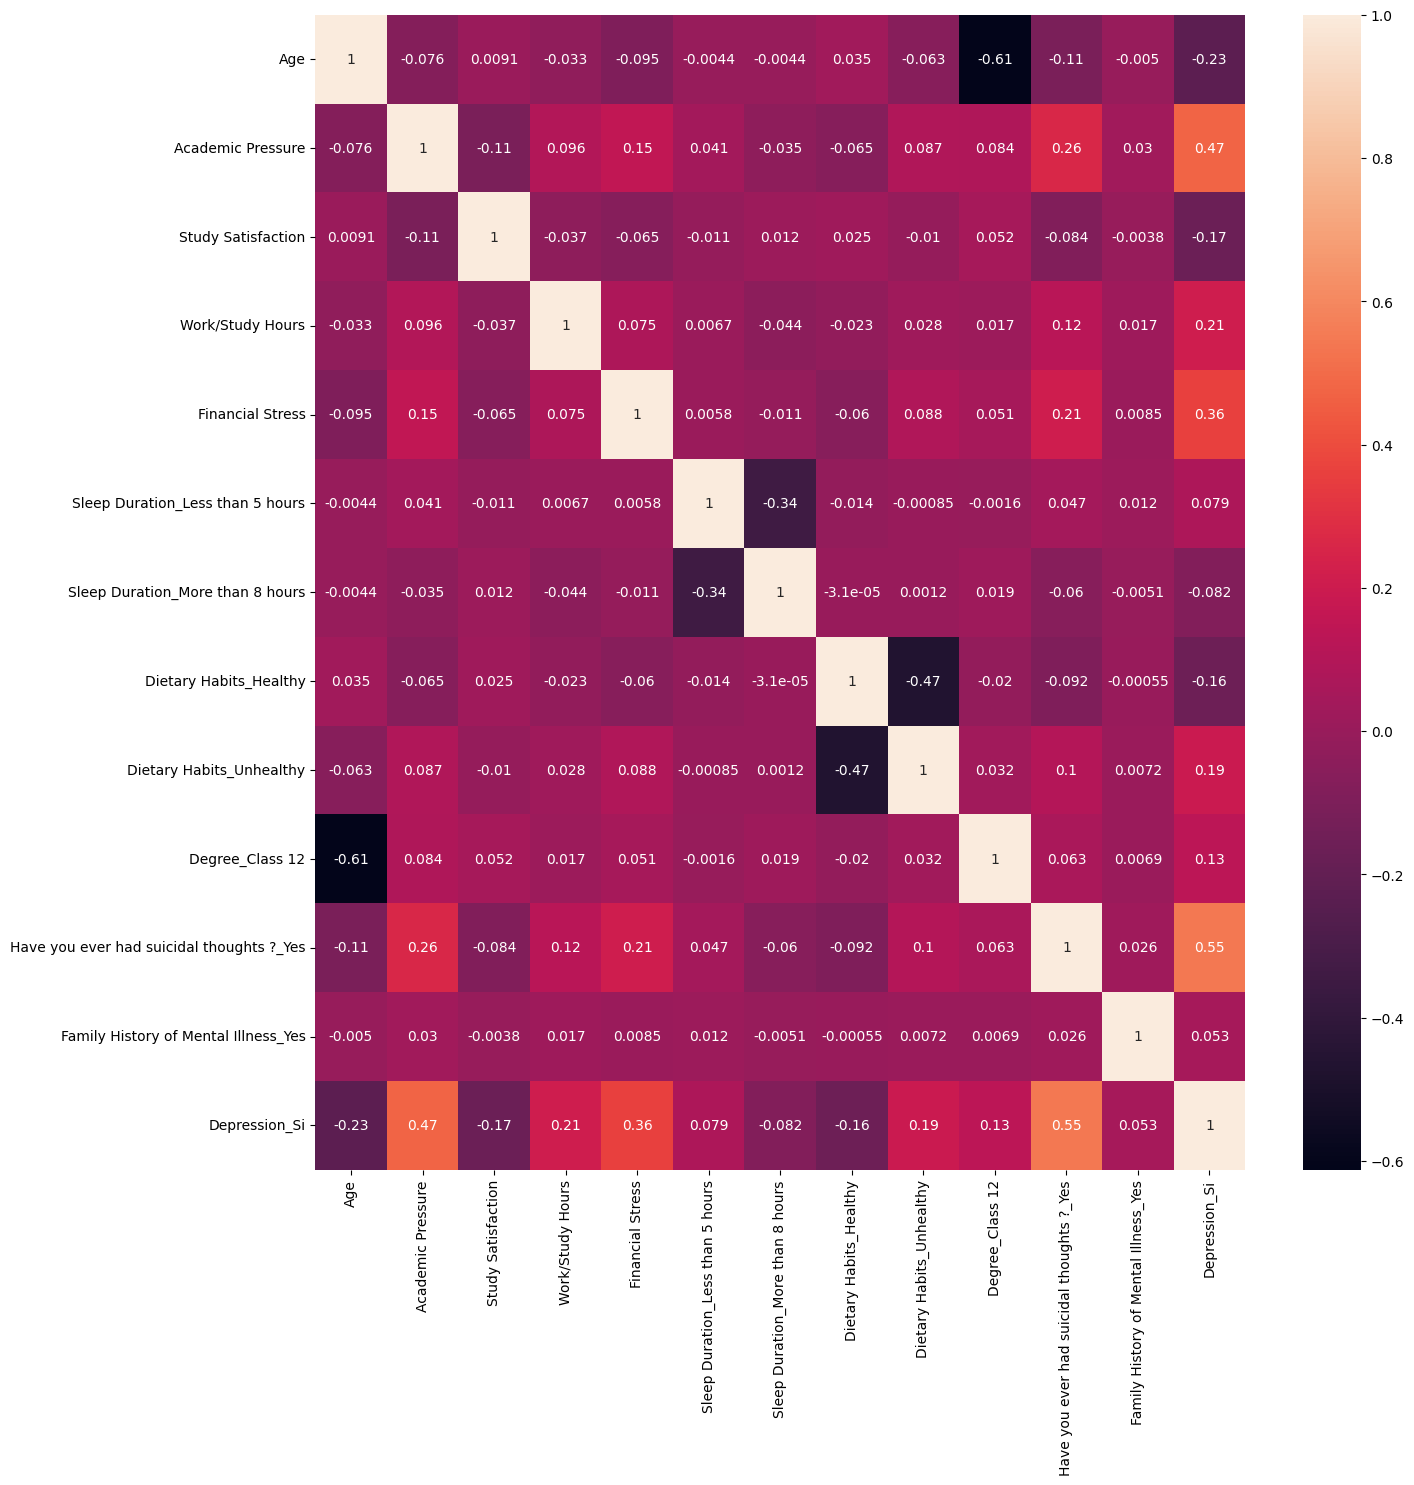

In [164]:
import seaborn as sns
plt.figure(figsize=(15,15))
sns.heatmap(data_matrix.corr(),annot=True)

In [165]:
#en clasificacion siempre aplico labelEncoder
#Se codifican las categorias de la VARIABLE OBJETIVO
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
data["Depression"]=labelencoder.fit_transform(data["Depression"]) #Objetivo
data.head()

Age  Academic Pressure  Study Satisfaction  Work/Study Hours  \
0  33.0                5.0                 2.0               3.0   
1  24.0                2.0                 5.0               3.0   
2  31.0                3.0                 5.0               9.0   
3  28.0                3.0                 2.0               4.0   
4  25.0                4.0                 3.0               1.0   

   Financial Stress  Depression  Sleep Duration_Less than 5 hours  \
0               1.0           1                                 0   
1               2.0           0                                 0   
2               1.0           0                                 1   
3               5.0           1                                 0   
4               1.0           0                                 0   

   Sleep Duration_More than 8 hours  Dietary Habits_Healthy  \
0                                 0                       1   
1                                 0                       0   
2                                 0                       1   
3                                 0                       0   
4                                 0                       0   

   Dietary Habits_Unhealthy  Degree_Class 12  \
0                         0                0   
1                         0                0   
2                         0                0   
3                         0                0   
4                         0                0   

   Have you ever had suicidal thoughts ?_Yes  \
0                                          1   
1                                          0   
2                                          0   
3                                          1   
4                                          1   

   Family History of Mental Illness_Yes  
0                                     0  
1                                     1  
2                                     1  
3                                     1  
4                                     0

In [166]:
#Guardamos los datos preparados para entrenar
data.to_excel('./datosdepresion_modelo.xlsx')

#Fase N°2 division 70-30

<Axes: xlabel='Depression'>

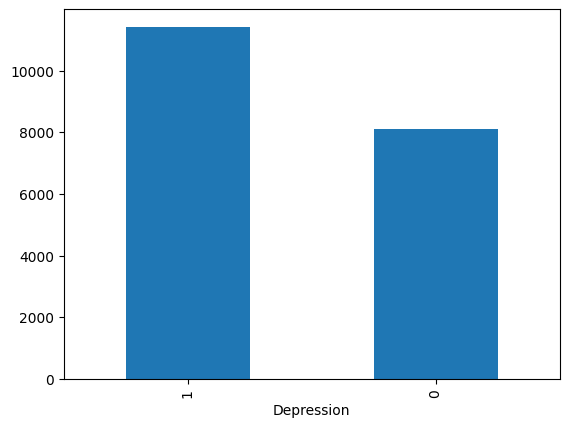

In [167]:
#División 70-30
# siempre en  clasificacion tiene que tener muestreo estratificado

from sklearn.model_selection import train_test_split
X = data.drop("Depression", axis = 1) # Variables predictoras
Y = data['Depression'] #Variable objetivo
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, stratify=Y) #Muestreo estratificado
Y_train.value_counts().plot(kind='bar')# Objetivo del 70%

<Axes: xlabel='Depression'>

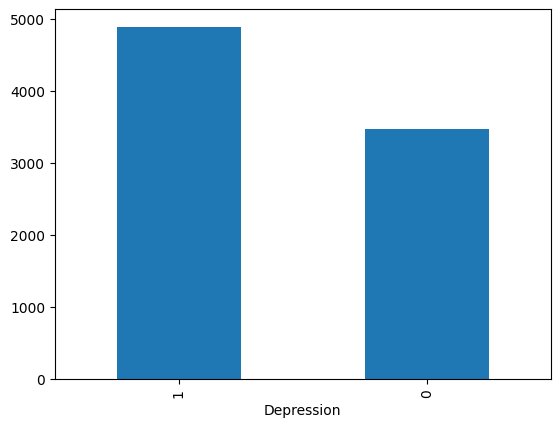

In [168]:
Y_test.value_counts().plot(kind='bar')# Objetivo del 30%

#Arbol de decision

In [169]:
#Creación del modelo con el conjunto de entrenamiento
from sklearn.tree import DecisionTreeClassifier

modelTree = DecisionTreeClassifier(criterion='gini', min_samples_leaf=2, max_depth=None) #gini, entropy
modelTree.fit(X_train, Y_train) #70% train

DecisionTreeClassifier(min_samples_leaf=2)

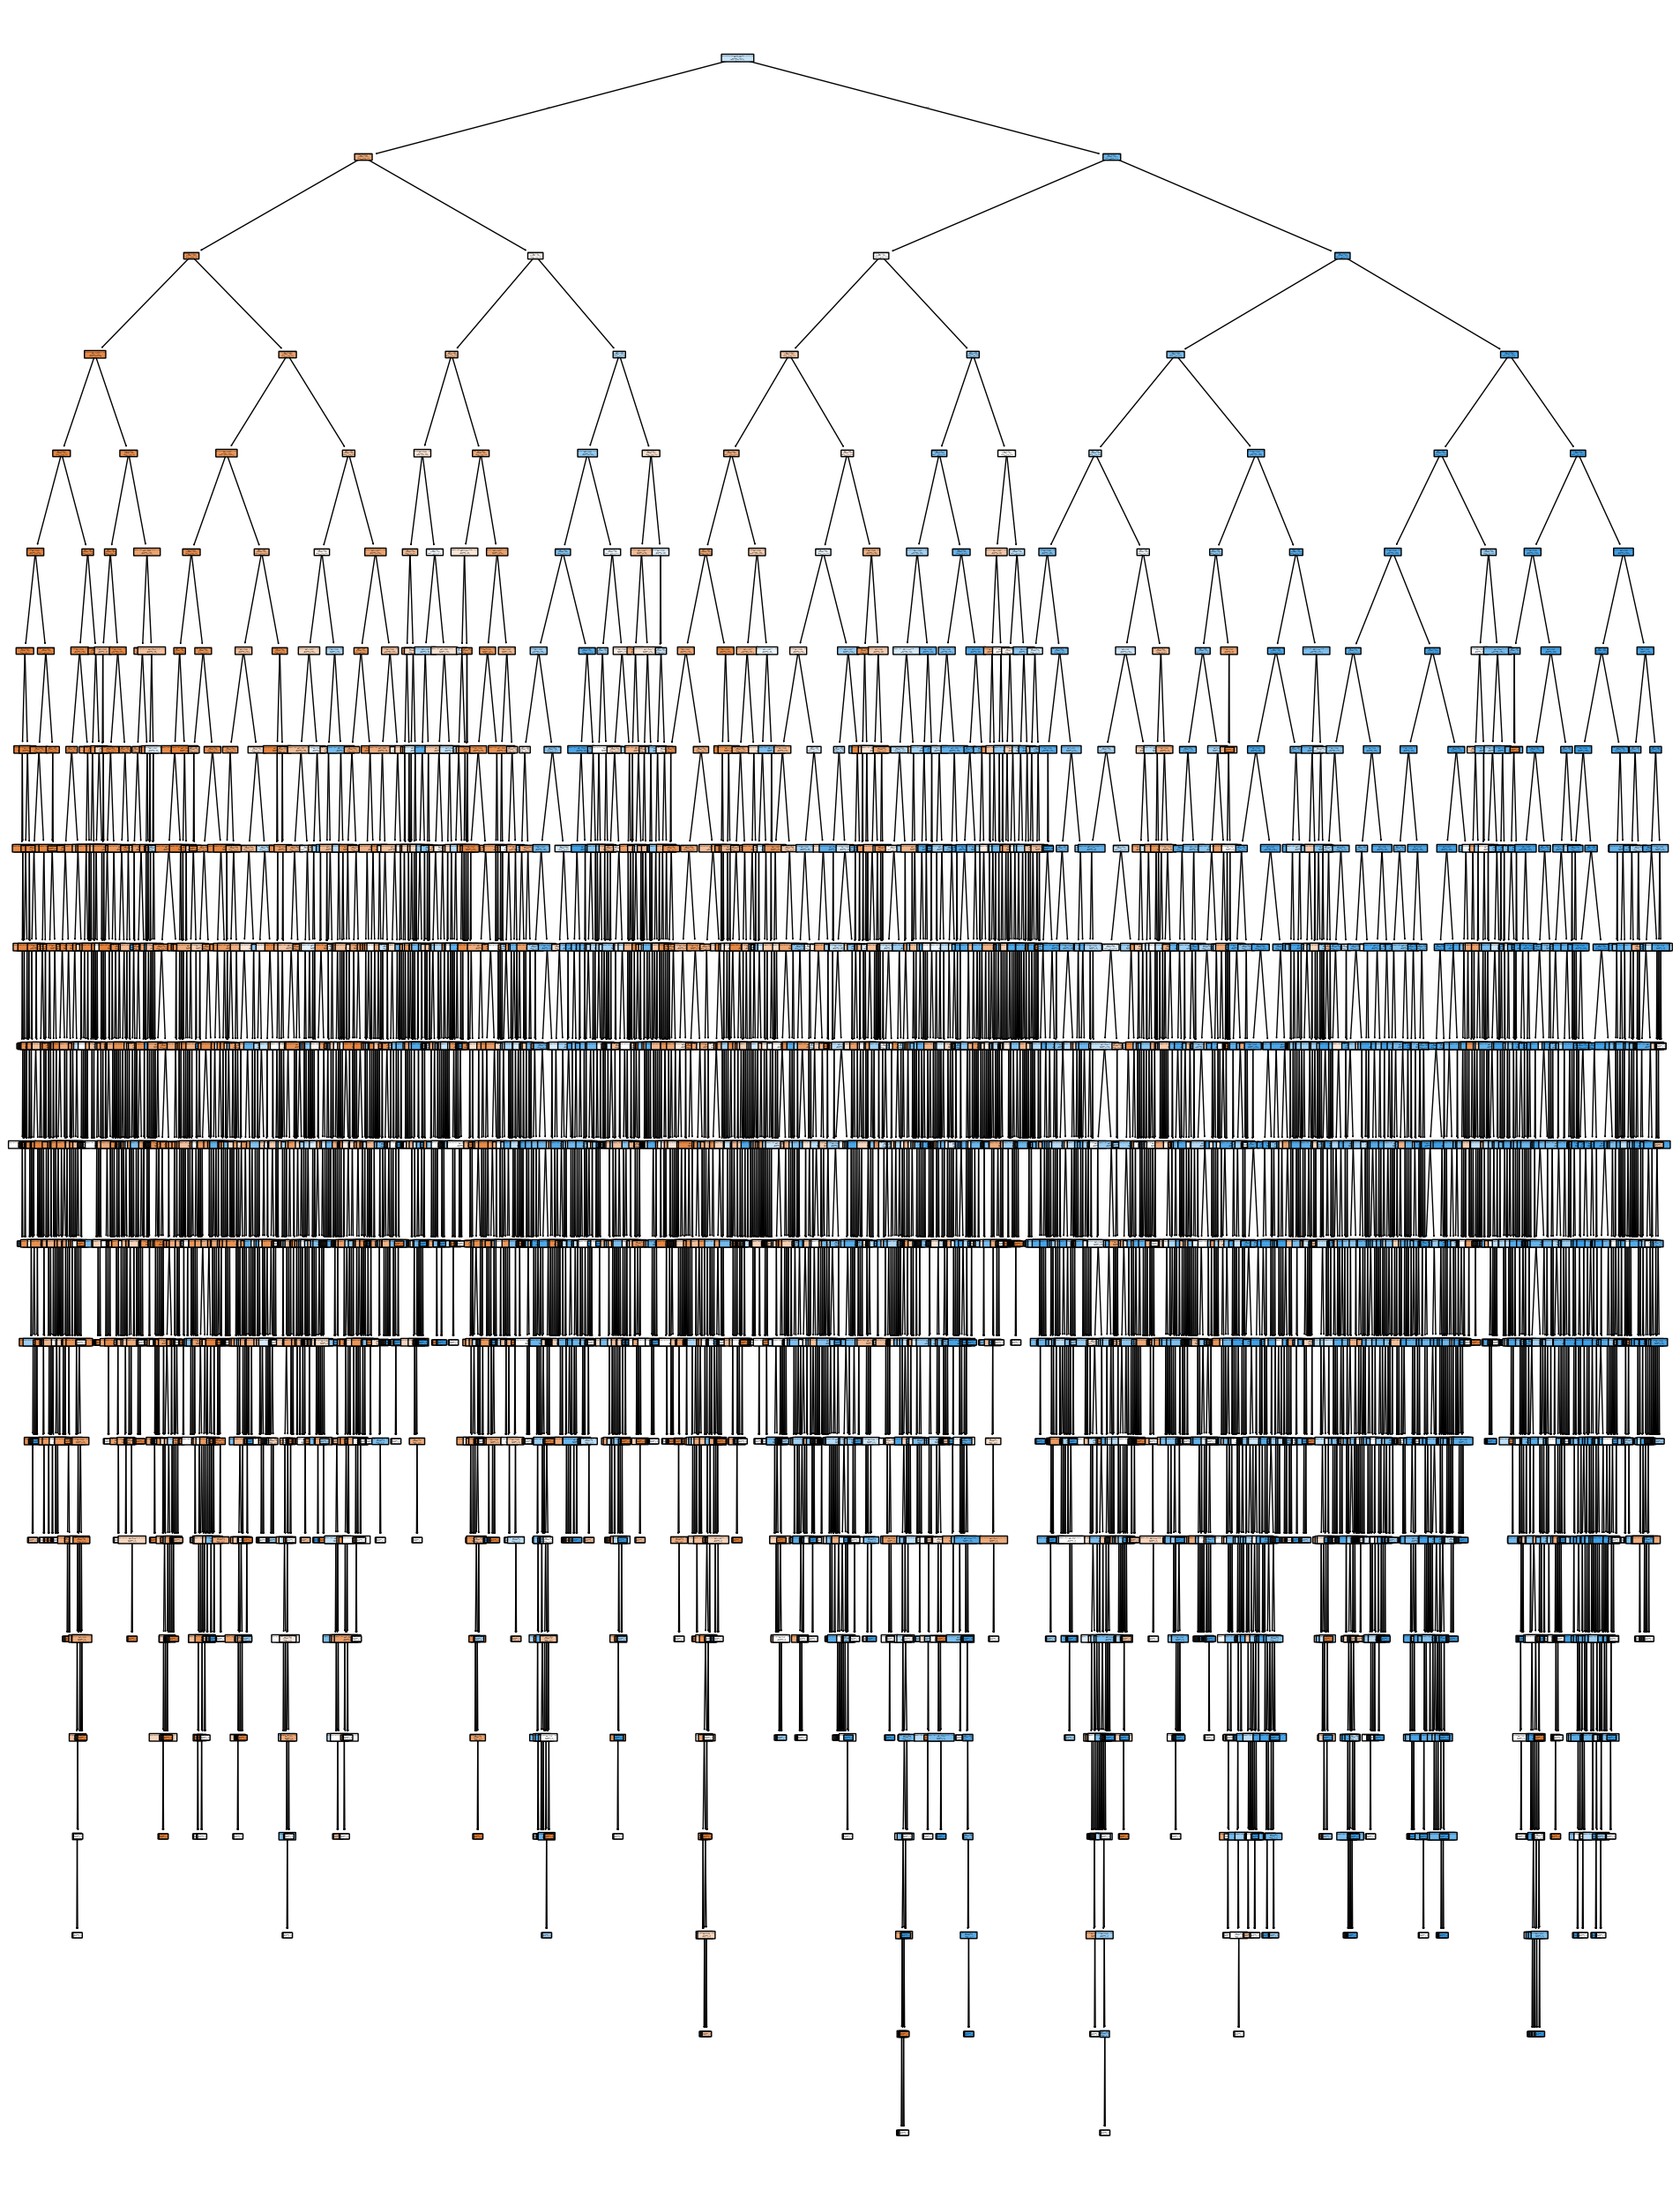

In [170]:
from sklearn.tree import plot_tree
plt.figure(figsize=(24,32))
plot_tree(modelTree, feature_names=X_train.columns.values, class_names=labelencoder.classes_, rounded=True, filled=True)
plt.show()

In [171]:
feature_importances = modelTree.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
feature_importance_df

Feature  Importance
10  Have you ever had suicidal thoughts ?_Yes    0.357087
1                           Academic Pressure    0.154579
0                                         Age    0.124944
3                            Work/Study Hours    0.102709
4                            Financial Stress    0.084820
2                          Study Satisfaction    0.062501
11       Family History of Mental Illness_Yes    0.025797
8                    Dietary Habits_Unhealthy    0.023707
5            Sleep Duration_Less than 5 hours    0.021401
6            Sleep Duration_More than 8 hours    0.019652
7                      Dietary Habits_Healthy    0.016752
9                             Degree_Class 12    0.006049

In [172]:
#Evaluación 30%
from sklearn import metrics

Y_pred = modelTree.predict(X_test) #30% Test
print(Y_pred)

[0 1 1 ... 0 1 0]


In [173]:
#Exactitud
exactitud=metrics.accuracy_score(y_true=Y_test, y_pred=Y_pred)
print(exactitud)

0.7734720727185743


In [174]:
#Matriz de confusion
from sklearn import metrics

cm=metrics.confusion_matrix(y_true=Y_test, y_pred=Y_pred)
cm

array([[2666,  803],
       [1091, 3801]])

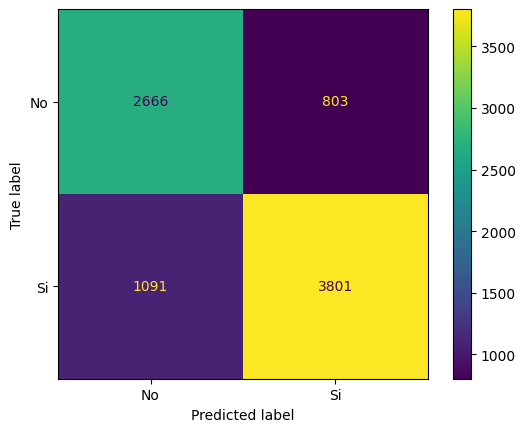

In [175]:
#Plot de la matriz de confusion
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=labelencoder.classes_)
disp.plot()

In [176]:
#Precision, Recall, f1, exactitud
print(metrics.classification_report( y_true=Y_test, y_pred=Y_pred, target_names=labelencoder.classes_))

              precision    recall  f1-score   support

          No       0.71      0.77      0.74      3469
          Si       0.83      0.78      0.80      4892

    accuracy                           0.77      8361
   macro avg       0.77      0.77      0.77      8361
weighted avg       0.78      0.77      0.77      8361



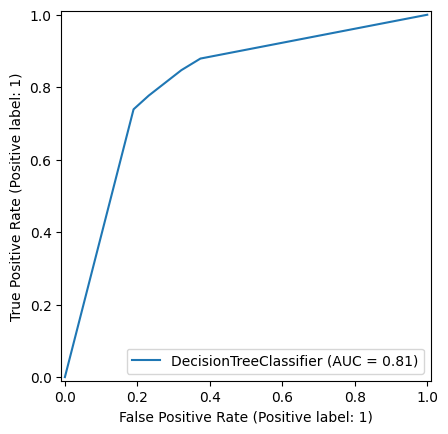

In [177]:
metrics.RocCurveDisplay.from_estimator(modelTree,X_test, Y_test)

#Random Forest


In [178]:
#Random forest no se normaliza
#Random Forest
from sklearn.ensemble import RandomForestClassifier

model_rf= RandomForestClassifier(n_estimators=100,  max_samples=0.7, criterion='gini',
                              max_depth=None, min_samples_leaf=2)
model_rf.fit(X_train, Y_train) #70%

RandomForestClassifier(max_samples=0.7, min_samples_leaf=2)

              precision    recall  f1-score   support

          No       0.82      0.79      0.80      3469
          Si       0.85      0.88      0.87      4892

    accuracy                           0.84      8361
   macro avg       0.84      0.83      0.83      8361
weighted avg       0.84      0.84      0.84      8361



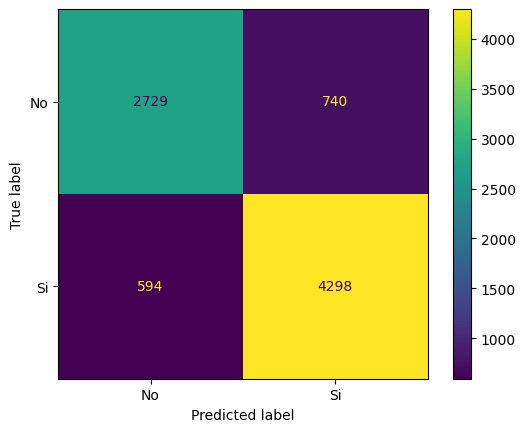

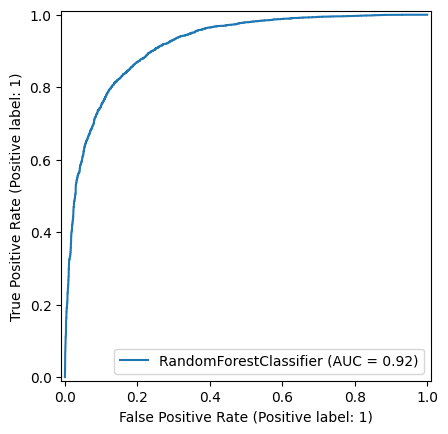

In [179]:
#Evaluación de RandomForest con 30%
from sklearn import metrics

Y_pred = model_rf.predict(X_test) #30%

#Matriz de confusion
cm=metrics.confusion_matrix(y_true=Y_test, y_pred=Y_pred)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=labelencoder.classes_)
disp.plot()

#Precision, Recall, f1, exactitud
print(metrics.classification_report( y_true=Y_test, y_pred=Y_pred, target_names=labelencoder.classes_))

# Curva ROC
metrics.RocCurveDisplay.from_estimator(model_rf,X_test, Y_test)

#KNN

In [180]:
data.head()

Age  Academic Pressure  Study Satisfaction  Work/Study Hours  \
0  33.0                5.0                 2.0               3.0   
1  24.0                2.0                 5.0               3.0   
2  31.0                3.0                 5.0               9.0   
3  28.0                3.0                 2.0               4.0   
4  25.0                4.0                 3.0               1.0   

   Financial Stress  Depression  Sleep Duration_Less than 5 hours  \
0               1.0           1                                 0   
1               2.0           0                                 0   
2               1.0           0                                 1   
3               5.0           1                                 0   
4               1.0           0                                 0   

   Sleep Duration_More than 8 hours  Dietary Habits_Healthy  \
0                                 0                       1   
1                                 0                       0   
2                                 0                       1   
3                                 0                       0   
4                                 0                       0   

   Dietary Habits_Unhealthy  Degree_Class 12  \
0                         0                0   
1                         0                0   
2                         0                0   
3                         0                0   
4                         0                0   

   Have you ever had suicidal thoughts ?_Yes  \
0                                          1   
1                                          0   
2                                          0   
3                                          1   
4                                          1   

   Family History of Mental Illness_Yes  
0                                     0  
1                                     1  
2                                     1  
3                                     1  
4                                     0

In [181]:
#Normalizacion las variables numéricas (las dummies no se normalizan)
#Se debe normalizar por que knn usa calculo por distancias
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
min_max_scaler.fit(data[['Age', 'Academic Pressure', 'Study Satisfaction', 'Work/Study Hours', 'Financial Stress']]) #Ajuste de los parametros: max - min

#Se aplica la normalización a 70%  y 30%
X_train[['Age', 'Academic Pressure', 'Study Satisfaction', 'Work/Study Hours', 'Financial Stress']]= min_max_scaler.transform(X_train[['Age', 'Academic Pressure', 'Study Satisfaction', 'Work/Study Hours', 'Financial Stress']]) #70%
X_test[['Age', 'Academic Pressure', 'Study Satisfaction', 'Work/Study Hours', 'Financial Stress']]= min_max_scaler.transform(X_test[['Age', 'Academic Pressure', 'Study Satisfaction', 'Work/Study Hours', 'Financial Stress']]) #30%
X_train.head()

Age  Academic Pressure  Study Satisfaction  Work/Study Hours  \
4773   0.024390                1.0                 1.0          0.333333   
23432  0.219512                0.6                 1.0          0.500000   
4780   0.390244                0.6                 0.8          0.333333   
19877  0.048780                0.6                 1.0          0.833333   
1575   0.170732                0.8                 0.2          0.583333   

       Financial Stress  Sleep Duration_Less than 5 hours  \
4773               0.25                                 0   
23432              0.25                                 0   
4780               0.75                                 0   
19877              0.25                                 0   
1575               0.75                                 0   

       Sleep Duration_More than 8 hours  Dietary Habits_Healthy  \
4773                                  0                       0   
23432                                 0                       0   
4780                                  1                       0   
19877                                 1                       1   
1575                                  1                       0   

       Dietary Habits_Unhealthy  Degree_Class 12  \
4773                          0                1   
23432                         0                0   
4780                          0                0   
19877                         0                1   
1575                          0                0   

       Have you ever had suicidal thoughts ?_Yes  \
4773                                           1   
23432                                          0   
4780                                           0   
19877                                          1   
1575                                           1   

       Family History of Mental Illness_Yes  
4773                                      0  
23432                                     1  
4780                                      1  
19877                                     0  
1575                                      0

In [182]:
#Aprendizaje KNN con 70%
from sklearn.neighbors  import KNeighborsClassifier #KNeighborsRegressor

modelKnn = KNeighborsClassifier(n_neighbors=1, metric='euclidean')#euclidean, minkowski
modelKnn.fit(X_train, Y_train) #70%

KNeighborsClassifier(metric='euclidean', n_neighbors=1)

              precision    recall  f1-score   support

          No       0.74      0.71      0.72      3469
          Si       0.80      0.82      0.81      4892

    accuracy                           0.77      8361
   macro avg       0.77      0.76      0.77      8361
weighted avg       0.77      0.77      0.77      8361



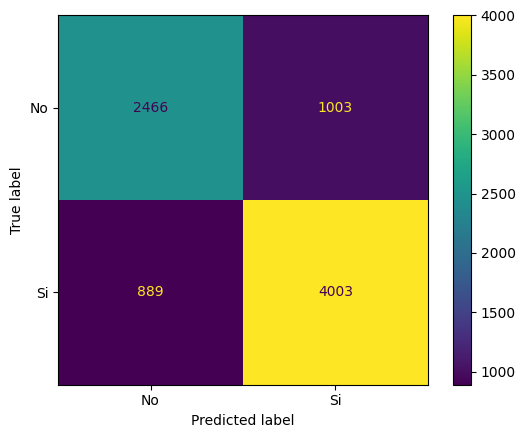

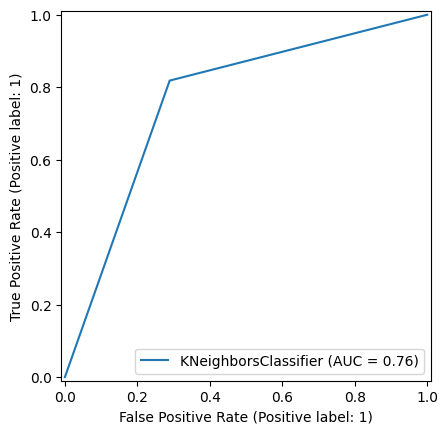

In [183]:
#Evaluación de Knn con 30%
from sklearn import metrics

Y_pred = modelKnn.predict(X_test) #30%

#Matriz de confusion
cm=metrics.confusion_matrix(y_true=Y_test, y_pred=Y_pred)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=labelencoder.classes_)
disp.plot()

#Precision, Recall, f1, exactitud
print(metrics.classification_report( y_true=Y_test, y_pred=Y_pred, target_names=labelencoder.classes_))

# Curva ROC
metrics.RocCurveDisplay.from_estimator(modelKnn,X_test, Y_test)

#Red Neuronal
* normalizar los datos

In [184]:
#Red Neuronal

from sklearn.neural_network import MLPClassifier #MLPRegressor

#Solo se configura capas ocultas, no se configura capa de entrada y de salida
modelNN = MLPClassifier(activation="logistic",hidden_layer_sizes=(5), learning_rate='constant',
                     learning_rate_init=0.2, momentum= 0.3, max_iter=500, random_state=3)

modelNN.fit(X_train, Y_train) #70% normalizados

MLPClassifier(activation='logistic', hidden_layer_sizes=5,
              learning_rate_init=0.2, max_iter=500, momentum=0.3,
              random_state=3)

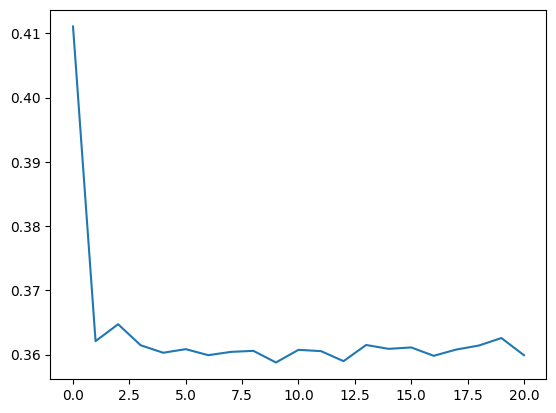

In [185]:
#Loss es la desviación entre Y_train y el Y_pred
loss_values = modelNN.loss_curve_
plt.plot(loss_values)

              precision    recall  f1-score   support

          No       0.79      0.84      0.82      3469
          Si       0.88      0.85      0.86      4892

    accuracy                           0.84      8361
   macro avg       0.84      0.84      0.84      8361
weighted avg       0.85      0.84      0.84      8361



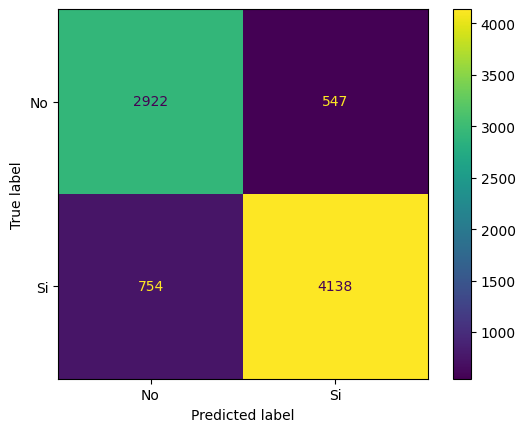

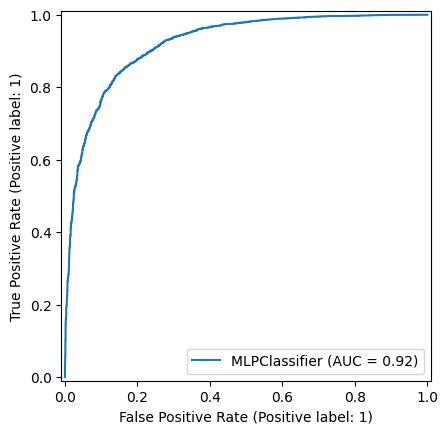

In [186]:
#Evaluación de Red Neuronal
from sklearn import metrics

Y_pred = modelNN.predict(X_test) #30%

#Matriz de confusion
cm=metrics.confusion_matrix(y_true=Y_test, y_pred=Y_pred)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=labelencoder.classes_)
disp.plot()

#Precision, Recall, f1, exactitud
print(metrics.classification_report( y_true=Y_test, y_pred=Y_pred, target_names=labelencoder.classes_))

# Curva ROC
metrics.RocCurveDisplay.from_estimator(modelNN,X_test, Y_test)

#svm
* Normalizar

In [187]:
#SVM
from sklearn.svm import SVC # SVR ->  SVC "clasificacion"------------------  SVR "regresion"

modelSVM = SVC(kernel='linear') #'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'
modelSVM.fit(X_train, Y_train) #70%

SVC(kernel='linear')

In [188]:
#Evaluación de SVM
from sklearn import metrics

Y_pred = modelSVM.predict(X_test) #30%

              precision    recall  f1-score   support

          No       0.83      0.79      0.81      3469
          Si       0.86      0.89      0.87      4892

    accuracy                           0.85      8361
   macro avg       0.84      0.84      0.84      8361
weighted avg       0.85      0.85      0.85      8361



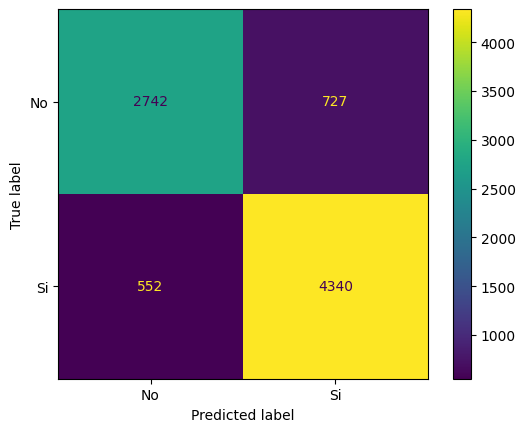

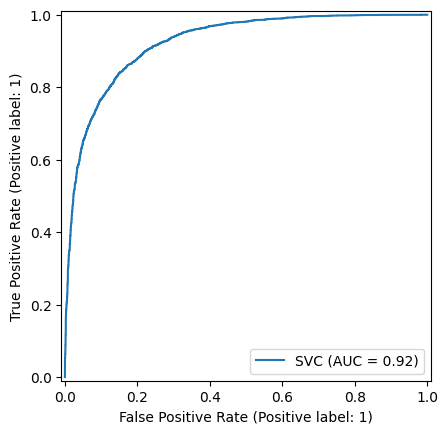

In [189]:
#Matriz de confusion
cm=metrics.confusion_matrix(y_true=Y_test, y_pred=Y_pred)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=labelencoder.classes_)
disp.plot()

#Precision, Recall, f1, exactitud
print(metrics.classification_report( y_true=Y_test, y_pred=Y_pred, target_names=labelencoder.classes_))

# Curva ROC
metrics.RocCurveDisplay.from_estimator(modelSVM,X_test, Y_test)

#Hiperparametrizado

Mejores hiperparámetros: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
              precision    recall  f1-score   support

          No       0.83      0.78      0.81      3469
          Si       0.85      0.89      0.87      4892

    accuracy                           0.84      8361
   macro avg       0.84      0.84      0.84      8361
weighted avg       0.84      0.84      0.84      8361



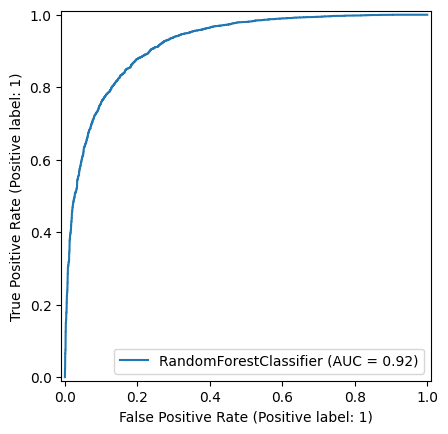

In [191]:
# Hiperparametrización de Random Forest
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 150],  # Número de árboles
    'max_depth': [None, 10, 20, 30],  # Profundidad máxima de los árboles
    'min_samples_split': [2, 5, 8],  # Mínimo de muestras para dividir un nodo
    'min_samples_leaf': [1, 2, 4],  # Mínimo de muestras en una hoja
    'max_features': ['sqrt', 'log2'],  # Número de características a considerar en cada división
}

# Crear el modelo de Random Forest
rf_model = RandomForestClassifier(random_state=42)

# Realizar la búsqueda en cuadrícula
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1) #n_jobs=-1 para utilizar todos los núcleos del procesador y CV= 3 para ahorrar memoria
grid_search.fit(X_train, Y_train)

# Obtener los mejores hiperparámetros
best_params = grid_search.best_params_
print("Mejores hiperparámetros:", best_params)

# Evaluar el modelo con los mejores hiperparámetros
best_rf_model = grid_search.best_estimator_
Y_pred = best_rf_model.predict(X_test)

# Imprimir las métricas de evaluación
print(metrics.classification_report(Y_test, Y_pred, target_names=labelencoder.classes_))
metrics.RocCurveDisplay.from_estimator(best_rf_model, X_test, Y_test)

In [195]:
#Medida de evaluación del mejor modelo
medidas = {}
medidas['RF']=grid_search.best_score_

# Mejores párametros
print( grid_search.best_params_)
print(medidas)

{'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
{'RF': np.float64(0.844071966784561)}


In [193]:
#Red Neuronal

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

modelNN = MLPClassifier()

# Initialize 'medidas' as a dictionary
medidas = {}

# Definir los parametros
random_state=[1] #Semilla para generar número pseudoaleatorios
solver=['sgd'] # Regla de aprendizaje ['adam','sgd','lbfgs']
learning_rate=['constant','adaptive'] #tasa de aprendizaje
learning_rate_init=[0.2, 0.5, 1.0] #valor tasa de aprendizaje
momentum=[0.3, 0.5, 1.0] #momentum
activation=['logistic', 'relu'] #'identity’, ‘logistic’, ‘tanh’, ‘relu’
hidden_layer_sizes=[20,100,[8, 20]] # neuronas de la capa oculta (input+output/2)
max_iter = [100,500] #iteraciones

#Grid
param_grid = dict(random_state=random_state,solver=solver,activation=activation, hidden_layer_sizes=hidden_layer_sizes, max_iter=max_iter, learning_rate=learning_rate,
                  learning_rate_init=learning_rate_init, momentum=momentum)
grid = GridSearchCV(estimator=modelNN, param_grid=param_grid, scoring='f1_macro', n_jobs=-1, cv=3) #cv=3 -> se realiza 3 por question de tiiempo en memoria
grid.fit(X_train, Y_train)

#Mejor modelo
modelNN= grid.best_estimator_

#Medida de evaluación del mejor modelo
medidas['NN']=grid.best_score_

# Mejores párametros
print( grid.best_params_)
print(medidas)

{'activation': 'relu', 'hidden_layer_sizes': 100, 'learning_rate': 'adaptive', 'learning_rate_init': 0.5, 'max_iter': 500, 'momentum': 0.3, 'random_state': 1, 'solver': 'sgd'}
{'NN': np.float64(0.8420241813249141)}


#evaluacion con el 30%

              precision    recall  f1-score   support

          No       0.83      0.78      0.81      3469
          Si       0.85      0.89      0.87      4892

    accuracy                           0.84      8361
   macro avg       0.84      0.84      0.84      8361
weighted avg       0.84      0.84      0.84      8361



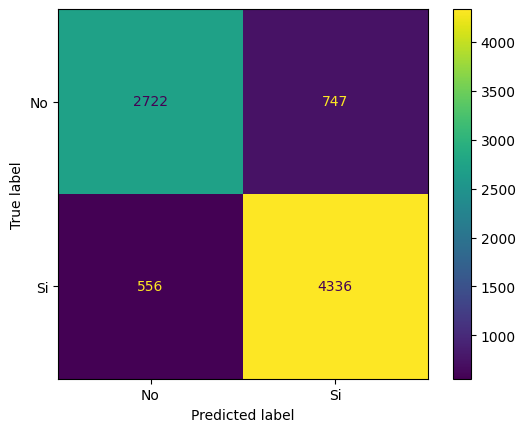

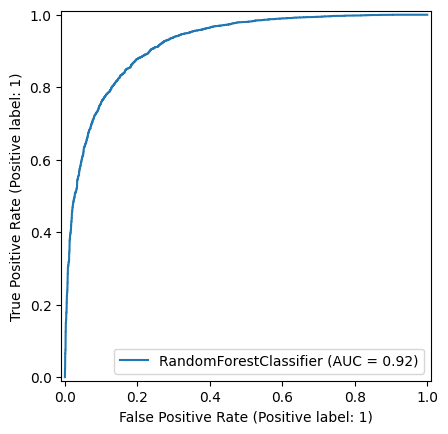

In [199]:
#Evaluación de Random forest
from sklearn import metrics

#Evaluación de RandomForest con 30%
Y_pred = best_rf_model.predict(X_test) #30%

#Matriz de confusion
cm=metrics.confusion_matrix(y_true=Y_test, y_pred=Y_pred)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=labelencoder.classes_)
disp.plot()

#Precision, Recall, f1, exactitud
print(metrics.classification_report(y_true=Y_test, y_pred=Y_pred, target_names=labelencoder.classes_))

# Curva ROC
metrics.RocCurveDisplay.from_estimator(best_rf_model,X_test, Y_test)

              precision    recall  f1-score   support

          No       0.83      0.80      0.81      3469
          Si       0.86      0.88      0.87      4892

    accuracy                           0.85      8361
   macro avg       0.84      0.84      0.84      8361
weighted avg       0.85      0.85      0.85      8361



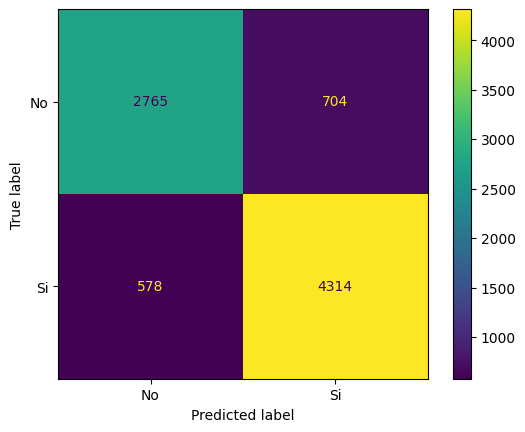

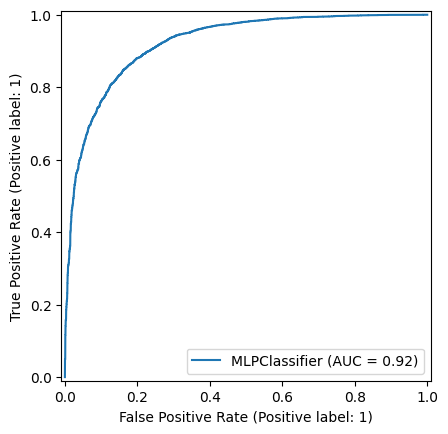

In [200]:
#Evaluación de Red Neuronal
from sklearn import metrics

Y_pred = modelNN.predict(X_test)

#Matriz de confusion
cm=metrics.confusion_matrix(y_true=Y_test, y_pred=Y_pred)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=labelencoder.classes_)
disp.plot()

#Precision, Recall, f1, exactitud
print(metrics.classification_report( y_true=Y_test, y_pred=Y_pred, target_names=labelencoder.classes_))

# Curva ROC
metrics.RocCurveDisplay.from_estimator(modelNN,X_test, Y_test)

#guardar el modelo

In [201]:
import pickle
filename = 'modelo-clas-hiper.pkl'
variables= X.columns._values
pickle.dump([best_rf_model,modelNN,labelencoder,variables,min_max_scaler], open(filename, 'wb')) #write